<a href="https://colab.research.google.com/github/sangkonpark/1day-1commit/blob/main/5%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Sparta_CodingClub_Telco_Customer.csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn : 고객 이탈 여부, 종속 변수.  
customerID : 고객의 고유한 ID.  
gender : 고객 성별.  
SeniorCitizen : 고객이 노약자인가 아닌가.  
Partner : 고객에게 파트너가 있는지 여부(결혼 여부).   
Dependents : 고객의 부양 가족 여부.  
tenure : 고객이 회사에 머물렀던 개월 수.  
PhoneService : 고객에게 전화 서비스가 있는지 여부.  
MultipleLines : 고객이 여러 회선을 사용하는지 여부.  
InternetService : 고객의 인터넷 서비스 제공업체.  
OnlineSecurity : 고객의 온라인 보안 여부.  
OnlineBackup : 고객이 온라인 백업을 했는지 여부.  
DeviceProtection : 고객에게 기기 보호 기능이 있는지 여부.  
TechSupport : 고객이 기술 지원을 받았는지 여부.  
StreamingTV : 고객이 스트리밍TV을 가지고 있는지 여부.  
StreamingMovies : 고객이 영화를 스트리밍하는지 여부.  
Contract : 고객의 계약기간.  
PaperlessBilling : 고객의 종이 없는 청구서 수신 여부(모바일 청구서).  
PaymentMethod : 고객의 결제 수단.  
MonthlyCharges : 매월 고객에게 청구되는 금액.  
TotalCharges : 고객에게 청구된 총 금액.  

In [ ]:
df['customerID'].nunique()

7043

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


여기서 잘 관찰을 하시다가 이상한 점을 찾아내셔야 하는데, TotalCharges라는 열이 현재 object(문자열) 데이터로 취급이 되고 있습니다.  
문자열 데이터를 수치형 데이터로 변환을 시도합니다.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

ValueError: ignored

그러면 에러가 발생하는데 " "라는 값이 존재하고 있어서 변환이 불가능하다는 의미입니다.  
" " 값이 존재하는 데이터의 인덱스를 추적해봅시다.

In [ ]:
missing_value_row = list(df[df['TotalCharges'] == " "].index)
print('Missing Value Rows-->', missing_value_row , '\nTotal rows-->', len(missing_value_row))

Missing Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows--> 11


값이 " "를 가지는 데이터는 0을 대신 넣어줍니다.

In [ ]:
# 공백값을 0으로 변환
for missing_row in missing_value_row :
    df['TotalCharges'][missing_row] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges의 자료형이 object에서 float64로 바뀐 것을 확인할 수 있습니다.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# 지속 회원과 탈퇴 회원의 통계랑 비교

In [ ]:
df.groupby("Churn").count()["customerID"]

Churn
No     5174
Yes    1869
Name: customerID, dtype: int64

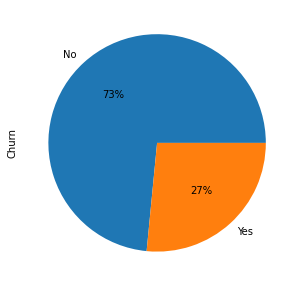

In [ ]:
df.Churn.value_counts().plot.pie(y='Churn', figsize=(5, 5), autopct='%1.0f%%')

데이터에서 지속 회원의 수는 5,174명이며 탈퇴 히원은 1,869명입니다.

In [ ]:
customer_stay = df[['MonthlyCharges','tenure']][df.Churn == 'No']
customer_stay.describe()

,MonthlyCharges,tenure
count,5174.000000,5174.000000
mean,61.265124,37.569965
std,31.092648,24.113777
min,18.250000,0.000000
25%,25.100000,15.000000
50%,64.425000,38.000000
75%,88.400000,61.000000
max,118.750000,72.000000


In [ ]:
customer_end = df[['MonthlyCharges','tenure']][df.Churn == 'Yes']
customer_end.describe()

,MonthlyCharges,tenure
count,1869.000000,1869.000000
mean,74.441332,17.979133
std,24.666053,19.531123
min,18.850000,1.000000
25%,56.150000,2.000000
50%,79.650000,10.000000
75%,94.200000,29.000000
max,118.350000,72.000000


탈퇴 회원일수록 월 사용료가 평균적으로 더 높았습니다.  
탈퇴 회원에 대해서 회원 기간(tenure)의 분포를 살펴봅시다. matplotlib을 사용해서 히스토그램을 작성합니다.

(array([877., 259., 159., 114., 102.,  98.,  72.,  70.,  46.,  72.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 10 Patch objects>)

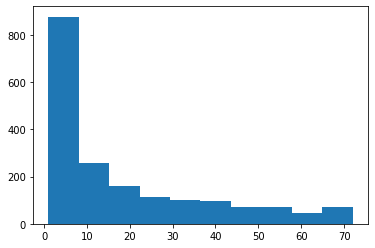

In [ ]:
plt.hist(customer_end["tenure"])

코드를 실행하면 히스토그램이 표시됩니다. 회원 기간이 10개월 이내인 고객이 많고, 10개월 이상의 고객 수는 거의 차이가 나지않거나 일정한 것을 알 수 있습니다. 

# 클러스터링

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 이탈한 고객의 경우의 MonthlyCharges와 tenure열 필터링
monthlyp_and_tenure = df[['MonthlyCharges','tenure']][df.Churn == 'Yes']
monthlyp_and_tenure

,MonthlyCharges,tenure
2,53.85,2
4,70.70,2
5,99.65,8
8,104.80,28
13,103.70,49
...,...,...
7021,59.80,12
7026,44.20,9
7032,75.75,1
7034,102.95,67


자, 이제 두 개의 열에 대해서 클러스터링을 해줄 것입니다.  
그런데 5강에서 클러스터링 전에 전체 열에 대해서 값에 정규화를 해주므로서 특정 열의 값에 좌지우지되지 않도록 해준 것 기억나시나요?  
그리고 4강 신용카드 사기 탐지에서 사실 정규화 방법에는 여러가지 방법이 있다고 코드스니펫을 통해 안내를 드린 적이 있습니다.  

해당 코드스니펫의 링크는 다음과 같았는데요.  

https://mkjjo.github.io/python/2019/01/10/scaler.html

해당 링크를 가보시면 알겠지만, 정규화 방법 중에는 MinMaxScaler라는 방법 또한 존재합니다.


In [ ]:
scaler = MinMaxScaler()
monthly_and_tenure_standardized = pd.DataFrame( scaler.fit_transform(monthlyp_and_tenure) )
monthly_and_tenure_standardized.columns = ['MonthlyCharges','tenure']

In [ ]:
monthly_and_tenure_standardized

,MonthlyCharges,tenure
0,0.351759,0.014085
1,0.521106,0.014085
2,0.812060,0.098592
3,0.863819,0.380282
4,0.852764,0.676056
...,...,...
1864,0.411558,0.154930
1865,0.254774,0.112676
1866,0.571859,0.000000
1867,0.845226,0.929577


K-means를 통해 3개의 클러스터를 만듭니다.

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(monthly_and_tenure_standardized)
monthly_and_tenure_standardized['cluster'] = kmeans.labels_

In [ ]:
monthly_and_tenure_standardized

,MonthlyCharges,tenure,cluster
0,0.351759,0.014085,0
1,0.521106,0.014085,2
2,0.812060,0.098592,2
3,0.863819,0.380282,1
4,0.852764,0.676056,1
...,...,...,...
1864,0.411558,0.154930,0
1865,0.254774,0.112676,0
1866,0.571859,0.000000,2
1867,0.845226,0.929577,1


In [ ]:
monthly_and_tenure_standardized.groupby("cluster").count()

,MonthlyCharges,tenure
cluster,,
0,456,456
1,464,464
2,949,949


그룹2가 다른 그룹에 비해 수가 두 배 정도 많고, 그룹1이 그룹0보다는 많지만 크게 차이나지 않습니다.

In [ ]:
monthly_and_tenure_standardized.groupby("cluster").mean()

,MonthlyCharges,tenure
cluster,,
0,0.195918,0.085125
1,0.722425,0.655628
2,0.652981,0.109515


결과를 보면 그룹 0은 월 사용료와 이용 기간 둘 다 짧습니다. 그룹 1은 월 사용료도 높고, 사용 기간 또한 길었구요. 그룹 2는 월 사용료는 높았지만, 사용 기간은 짧았습니다. (앞서 확인했듯이 가장 많은 수의 이탈 고객에 해당됩니다.) 그룹의 특징을 알면 그룹별로 다른 캠페인을 사용할 수 있습니다.

이제 시각화를 진행해봅시다.  
강의에서 스포츠센터 고객 데이터에서는 클러스터링 시각화를 위해서 5차원을 2차원으로 줄이기 위해서 차원 축소를 사용하였지만,  
현재는 특성이 2차원밖에 없으므로 굳이 차원 축소를 사용할 필요가 없습니다.  
각각의 특성이 x축과 y축이 되어줄 것이기 때문입니다.

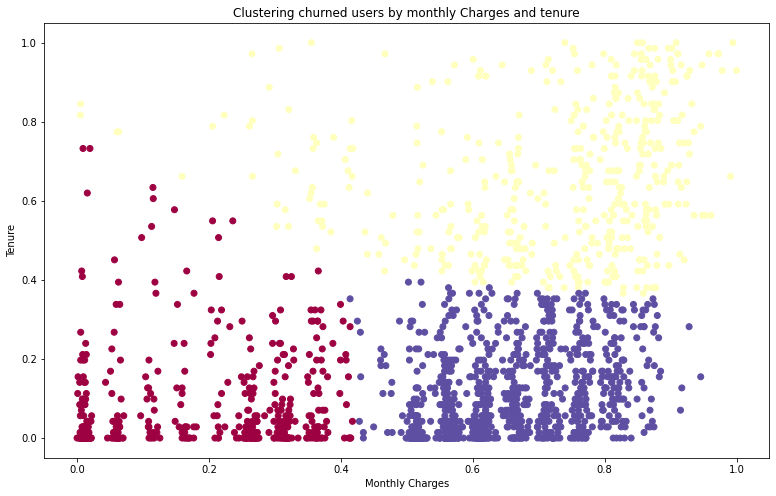

In [ ]:
# 군집 결과에 대한 산점도
fig, ax = plt.subplots(figsize=(13,8))
plt.scatter( monthly_and_tenure_standardized['MonthlyCharges'], monthly_and_tenure_standardized['tenure'],
           c = monthly_and_tenure_standardized['cluster'], cmap = 'Spectral')

plt.title('Clustering churned users by monthly Charges and tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.show()

월간 요금이 낮았던 대부분의 이탈 사용자는 매우 빠른 시간 내로 이탈했습니다. 이들은 더 낮은 금액이나 가성비가 좋은 업체로 빠르게 이동하는 것을 바랬을 수 있습니다. 이탈 사용자 중 사용 기간이 길고 낮은 가격을 가진 경우의 이탈 사용자는 매우 적습니다.

#전처리

In [ ]:
del df["customerID"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
gender_map = {"Female" : 0, "Male": 1}
yes_no_map = {"Yes" : 1, "No" : 0}

df["gender"] = df["gender"].map(gender_map)

def binary_encode(features):
    for feature in features:
        df[feature] = df[feature].map(yes_no_map)

현재 타입이 object이면서 값의 종류가 2개(Yes와 No)밖에 없는 경우에 대해서 전부 1과 0으로 변환.

In [ ]:
binary_encode_candidate = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
binary_encode(binary_encode_candidate)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


#바차트

In [ ]:
def plot_categoricals(columns, title):
  fig, axs = plt.subplots(ncols=2, nrows=int(len(columns) / 2) + len(columns) % 2)
  fig.set_size_inches(10, 10)

  row = col = 0
  for column in columns:
    plot_title = '{}: {}'.format(title, column)
    sns.countplot(x=column, hue="Churn", data=df, ax=axs[row][col]).set_title(plot_title)

    if col == 1:
      col = 0
      row += 1
    else:
      col += 1

  plt.tight_layout()

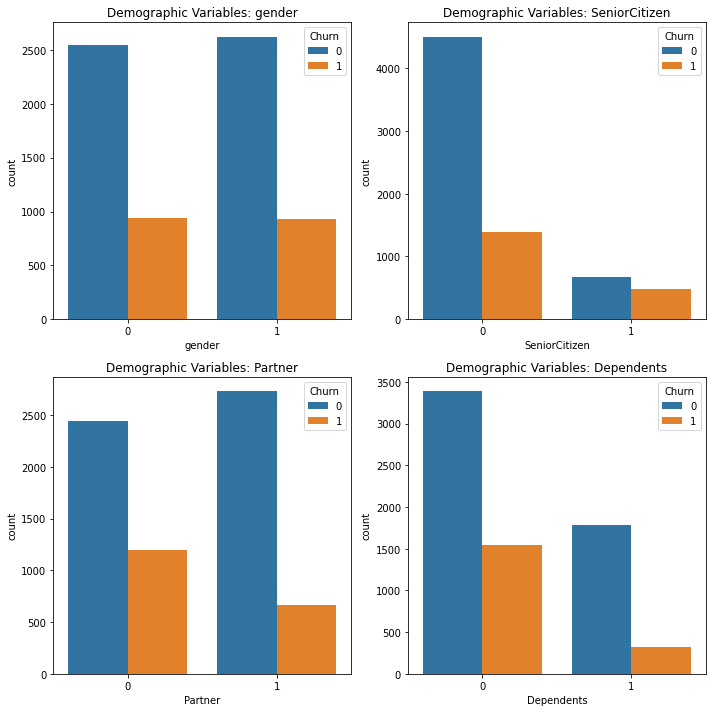

In [ ]:
plot_categoricals(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], 'Demographic Variables')

#Boxplot

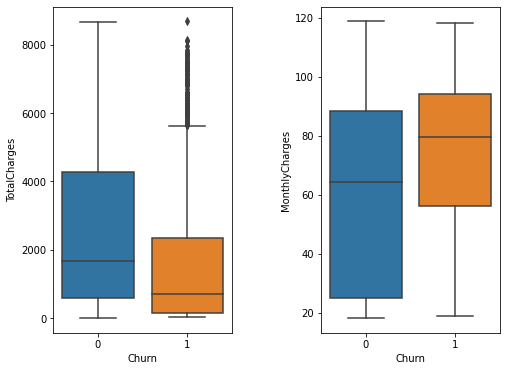

In [ ]:
_, ax = plt.subplots(1, 2, figsize= (8, 6))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = 'Churn',  y = 'TotalCharges', data = df, ax=ax[0])
sns.boxplot(x = 'Churn',  y = 'MonthlyCharges', data = df, ax=ax[1])

#더미형 변수 추가

In [ ]:
final_df = pd.get_dummies(df)

In [ ]:
final_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
final_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

#각종 머신 러닝 모델을 이용한 학습

In [ ]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X = np.array(final_df.drop(['Churn'], axis=1))
y = np.array(final_df['Churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def get_metrics( model ):
    y_pred = model.predict(X_test)
    y_actual = y_test 
    print()
    print('-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*')
    print()
    print('테스트 데이터에 대한 정확도 :' , metrics.accuracy_score(y_actual, y_pred)*100 , '%' )
    print()
    f1_score = metrics.f1_score(y_actual,y_pred)
    precision = metrics.precision_score(y_actual,y_pred)
    recall = metrics.recall_score(y_actual,y_pred)
    score_dict = { 'f1_score':[f1_score], 'precision':[precision], 'recall':[recall]}
    score_frame = pd.DataFrame(score_dict)
    print(score_frame)
    print(' ')

In [ ]:
svc = SVC(C=0.01, kernel='linear', probability=True)
svc.fit(X_train, y_train) 
print('훈련 데이터에 대한 정확도 :',svc.score(X_train,y_train)*100,'%')
get_metrics(svc)

훈련 데이터에 대한 정확도 : 79.67696130635427 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

테스트 데이터에 대한 정확도 : 81.90205819730305 %

   f1_score  precision    recall
0  0.628821   0.687898  0.579088
 


In [ ]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(X_train, y_train) 
print('훈련 데이터에 대한 정확도 :',lr.score(X_train,y_train)*100,'%')
get_metrics(lr)

훈련 데이터에 대한 정확도 : 80.31593894213702 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

테스트 데이터에 대한 정확도 : 82.18594748048261 %

   f1_score  precision    recall
0   0.64194   0.685976  0.603217
 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)
print('훈련 데이터에 대한 정확도 :',tree.score(X_train, y_train)*100,'%')
get_metrics(tree)

훈련 데이터에 대한 정확도 : 81.06141285055023 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

테스트 데이터에 대한 정확도 : 80.34066713981547 %

   f1_score  precision    recall
0   0.58841       0.66  0.530831
 


In [ ]:
forest = RandomForestClassifier(n_estimators=2, random_state=0)
forest.fit(X_train, y_train)
print('훈련 데이터에 대한 정확도 :',forest.score(X_train, y_train)*100,'%')
get_metrics(forest)

훈련 데이터에 대한 정확도 : 90.22009229676962 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

테스트 데이터에 대한 정확도 : 77.57274662881476 %

   f1_score  precision    recall
0  0.441696   0.647668  0.335121
 


In [ ]:
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(X_train, y_train)
print('훈련 데이터에 대한 정확도 :',grbt.score(X_train, y_train)*100,'%')
get_metrics(grbt)

훈련 데이터에 대한 정확도 : 82.67660631877885 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

테스트 데이터에 대한 정확도 : 80.90844570617459 %

   f1_score  precision    recall
0  0.601481   0.672185  0.544236
 


#값 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
std = StandardScaler()
scaled = std.fit_transform(final_df[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

In [ ]:
scaled.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874


In [ ]:
scaled_df_copy = final_df.copy()

In [ ]:
scaled_df_copy = scaled_df_copy.drop(columns = num_cols,axis = 1)
scaled_df_copy = scaled_df_copy.merge(scaled, left_index=True, right_index=True, how = "left")

In [ ]:
scaled_df_copy 

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.277445,-1.160323,-0.992611
1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.066327,-0.259629,-0.172165
2,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,-1.236724,-0.362660,-0.958066
3,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0.514251,-0.746535,-0.193672
4,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.236724,0.197365,-0.938874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,-0.340876,0.665992,-0.127605
7039,0,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1.613701,1.277533,2.242606
7040,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-0.870241,-1.168632,-0.852932
7041,1,1,1,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,-1.155283,0.320338,-0.870513


#재학습

In [ ]:
X = np.array(scaled_df_copy.drop(['Churn'], axis=1))
y = np.array(scaled_df_copy['Churn'])

X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2 , random_state = 42 )

In [ ]:
svc = SVC(C=0.01, kernel='linear')
svc.fit(X_train, y_train) 
print('훈련 데이터에 대한 정확도 : ',svc.score(X_train,y_train)*100,'%')
get_metrics(svc)

훈련 데이터에 대한 정확도 :  79.78345757898474 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

테스트 데이터에 대한 정확도 : 82.11497515968772 %

   f1_score  precision    recall
0  0.634783   0.690852  0.587131
 


In [ ]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(X_train, y_train) 
print('훈련 데이터에 대한 정확도 :',lr.score(X_train,y_train)*100,'%')
get_metrics(lr)

훈련 데이터에 대한 정확도 : 80.20944266950657 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

테스트 데이터에 대한 정확도 : 81.90205819730305 %

   f1_score  precision    recall
0  0.634146   0.682099  0.592493
 


In [ ]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)
print('훈련 데이터에 대한 정확도 :',tree.score(X_train, y_train)*100,'%')
get_metrics(tree)

훈련 데이터에 대한 정확도 : 81.06141285055023 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

테스트 데이터에 대한 정확도 : 80.34066713981547 %

   f1_score  precision    recall
0   0.58841       0.66  0.530831
 


In [ ]:
forest = RandomForestClassifier(n_estimators=2, random_state=0)
forest.fit(X_train, y_train)
print('훈련 데이터에 대한 정확도 :',forest.score(X_train, y_train)*100,'%')
get_metrics(forest)

훈련 데이터에 대한 정확도 : 89.86510472133476 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

테스트 데이터에 대한 정확도 : 76.22427253371185 %

   f1_score  precision    recall
0  0.417391   0.594059  0.321716
 


In [ ]:
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(X_train, y_train)
print('훈련 데이터에 대한 정확도 :',grbt.score(X_train, y_train)*100,'%')
get_metrics(grbt)

훈련 데이터에 대한 정확도 : 82.67660631877885 %

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

테스트 데이터에 대한 정확도 : 80.97941802696948 %

   f1_score  precision    recall
0   0.60355   0.673267  0.546917
 


In [ ]:
svc = SVC(C=0.01, kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(X_train, y_train) 
y_pred = lr.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
tree = DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
forest = RandomForestClassifier(n_estimators=2, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
grbt = GradientBoostingClassifier(random_state=0)
grbt.fit(X_train, y_train)
y_pred = grbt.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))